In [21]:
import gc
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from Haldane_anis_unsupervised_class import *
import pickle
from quimb.tensor import Tensor

In [22]:
L = 10 
ls = 30 # even
bond = 30 # resonable amount
path  = f"/home/mehran/4th_project-Haldan_anisotropic/dataset_L={L}_bond={bond}_ls={ls}"
os.makedirs(path, exist_ok=True)

In [23]:
dataset = Haldan_anis_unsupervised(L = L, ls = ls).generate_Entire_set() # dataset = DMRG_states

file_path = os.path.join(path, 'dataset.pkl')
with open(file_path, "wb") as f:
    pickle.dump(dataset, f)
gc.collect(2)

/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  

26

In [24]:
def gram_matrix_DMRG_11():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset.shape[0]
    gs = loaded_dataset
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(0,int(d/2)):
        for j in range(0,int(d/2)):
            afinity_train[i,j] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_11= os.path.join(path, "kernel_test_Haldane_11.hdf5")
with h5py.File(file_path_11, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_11", data = gram_matrix_DMRG_11())
    
gc.collect(2)

0

In [25]:
def gram_matrix_DMRG_12():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset.shape[0]
    gs = loaded_dataset
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(0,int(d/2)):
        for j in range(int(d/2),d):
            afinity_train[i,j-int(d/2)] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_12 = os.path.join(path, "kernel_test_Haldane_12.hdf5")
with h5py.File(file_path_12, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_12", data = gram_matrix_DMRG_12())
    
gc.collect(2)

0

In [26]:
def gram_matrix_DMRG_21():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset.shape[0]
    gs = loaded_dataset
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(int(d/2),d):
        for j in range(0,int(d/2)):
            afinity_train[i-int(d/2),j] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_21 = os.path.join(path, "kernel_test_Haldane_21.hdf5")
with h5py.File(file_path_21, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_21", data = gram_matrix_DMRG_21())
    
gc.collect(2)

0

In [27]:
def gram_matrix_DMRG_22():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset.shape[0]
    gs = loaded_dataset
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(int(d/2),d):
        for j in range(int(d/2),d):
            afinity_train[i-int(d/2),j-int(d/2)] = np.abs(gs[i].H @ gs[j])**2
    return afinity_train

file_path_22 = os.path.join(path, "kernel_test_Haldane_22.hdf5")
with h5py.File(file_path_22, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_22", data = gram_matrix_DMRG_22())
    
gc.collect(2)

0

In [28]:
res11 = h5py.File(file_path_11 ,'r')[' gram_matrix_DMRG_11'][:]
res12 = h5py.File(file_path_12 ,'r')[' gram_matrix_DMRG_12'][:]
res21 = h5py.File(file_path_21 ,'r')[' gram_matrix_DMRG_21'][:]
res22 = h5py.File(file_path_22 ,'r')[' gram_matrix_DMRG_22'][:]
kernel = np.block([[res11, res12],
                  [res21, res22]])

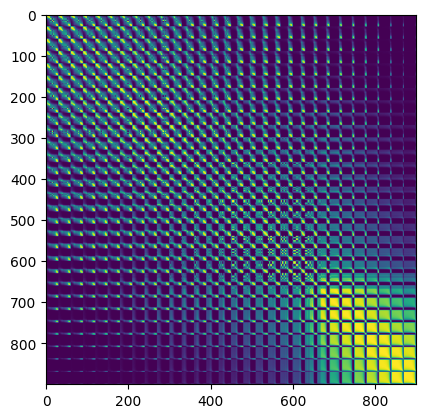

In [29]:
plt.imshow(kernel)